# CAR PRICE PRIDICTION



# Project Description

This project aims to develop a predictive model that estimates the selling price of used cars based on various features such as brand, manufacturing year, kilometers driven, fuel type, and more. Using regression techniques, particularly linear regression and potentially other advanced models (e.g., Random Forest, XGBoost), the goal is to understand the key factors influencing car prices and build a robust model that can predict prices accurately.


# Import libraries

We import essential Python libraries needed for the project:

pandas for data manipulation.

numpy for numerical operations.

matplotlib & seaborn for data visualization.

scikit-learn for model training, evaluation, and preprocessing.

Each library plays a crucial role in tasks like cleaning data, visualizing patterns, building machine learning models, and measuring their performance.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# LOADING DATASET

In this step, we load the dataset using pandas.read_csv() and preview the data using head(). This helps understand the structure of the dataset, types of features, and target variable (selling_price).



In [3]:

df = pd.read_csv("/content/Car_Price.csv")


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# DATA CLEANING

This step ensures the dataset is error-free and ready for analysis. It includes:

Handling missing values: Missing data is removed or filled.

Converting data types: Ensuring features are in correct format (e.g., converting strings to numbers).

Removing duplicates: Ensures no repeated records exist, which could skew analysis.

In [8]:
# HANDLEING MISSING VALUE

df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
#Convert data types
df.dtypes


,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object


In [12]:
#Remove duplicates
df.drop_duplicates(inplace=True)

# EXPLORATORY DATA ANALYSIS


EDA is the process of visualizing and summarizing the main characteristics of the data. It includes:

# a. Univariate Analysis

Univariate analysis: Analyzing one variable at a time (e.g., distribution of selling_price).

In [13]:
# TAKEING OUT THE COMPANY NAME COLUMN
df['car_brand']=df['name'].str.split(' ')

df['car_brand'] = df['car_brand'].apply(lambda x: x[0])
df

df = df.drop(columns=['name'])
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


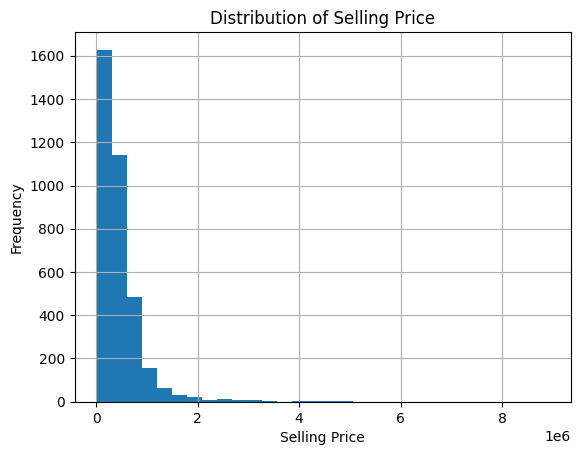

In [14]:
df['selling_price'].hist(bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [15]:
for i in df.select_dtypes('object').columns:
    print(f"Unique values for column {i} :\nNo of Unique values is {df[i].nunique()}\n{df[i].unique()}\n \n")


Unique values for column fuel :
No of Unique values is 5
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
 

Unique values for column seller_type :
No of Unique values is 3
['Individual' 'Dealer' 'Trustmark Dealer']
 

Unique values for column transmission :
No of Unique values is 2
['Manual' 'Automatic']
 

Unique values for column owner :
No of Unique values is 5
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
 

Unique values for column car_brand :
No of Unique values is 29
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
 



In [16]:
df['car_brand'].value_counts()

,count
car_brand,
Maruti,1072
Hyundai,637
Mahindra,328
Tata,308
Ford,220
Honda,216
Toyota,170
Chevrolet,151
Renault,110


In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


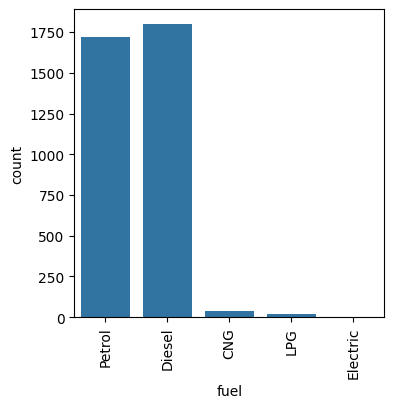

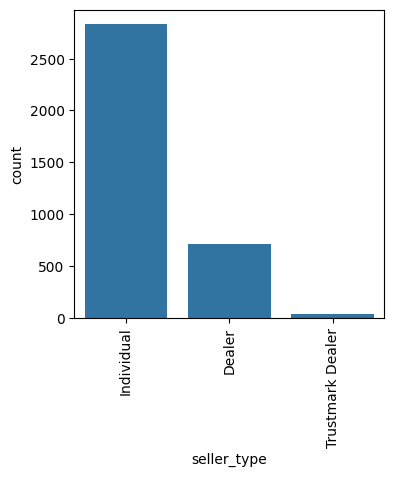

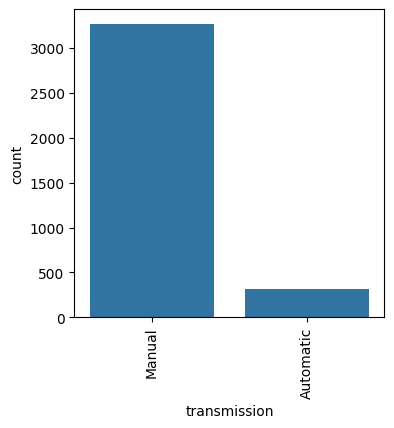

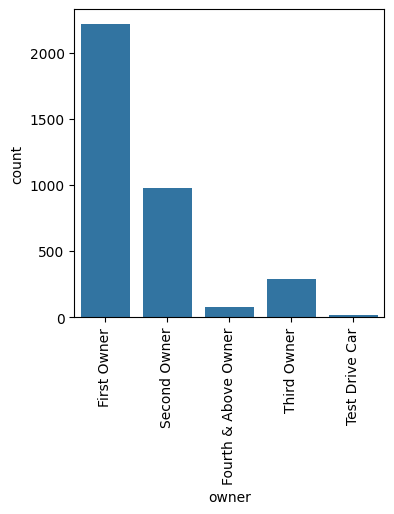

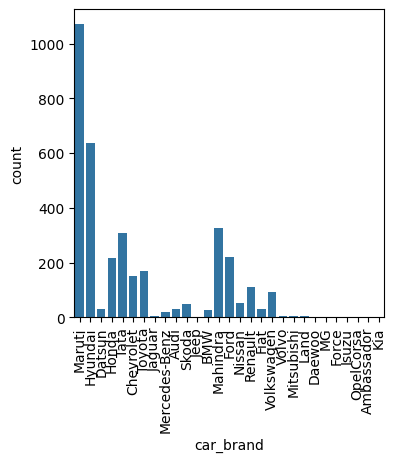

In [18]:
for i in df.select_dtypes('object').columns:
    plt.figure(figsize=(4,4))
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

#### Observation:
- Major Cars are of Petrol and Diesel
- Most of the Cars are owned by individuals
- Almost all cars are of manual transmission
- Most of the cars are 1st owned.
- The data is dominated by famous brands. Brands like kia, jaguar and Daewoo have very few cars.

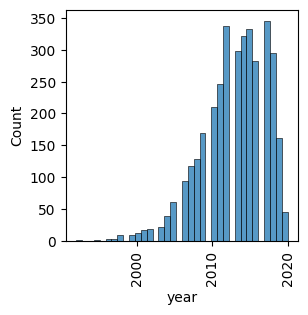

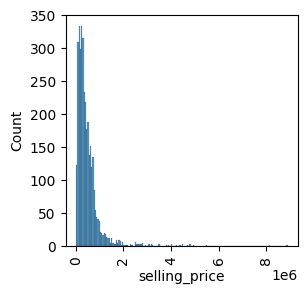

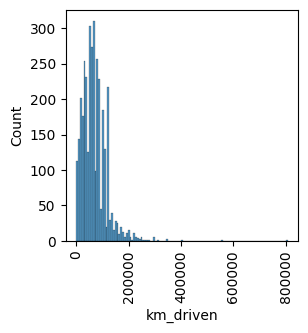

In [19]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(3,3))
    sns.histplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

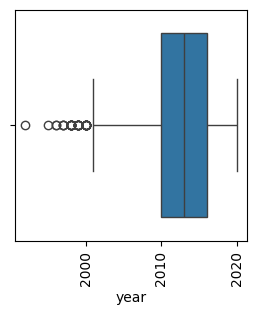

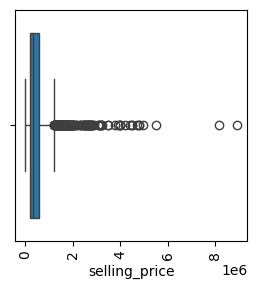

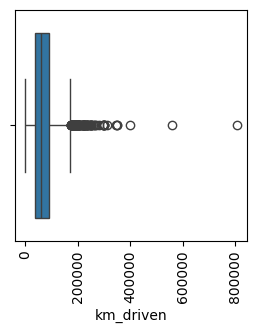

In [21]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()


#### Observations
- The Year column is left skewed
- The selling price is right skewed and follows a approximately log normal distribution.
- The kilometer driven is right skewed and follows a approximately log normal distribution.
- The KM driven has many outliers that are have very high values
- The Year purchased has outliers that have very low values

# b. Bivariate Analysis

Bivariate analysis: Understanding the relationship between two variables (e.g., km_driven vs. selling_price).

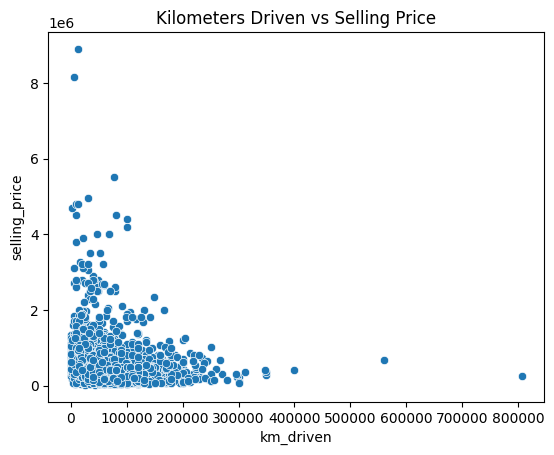

In [20]:
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Kilometers Driven vs Selling Price')
plt.show()


In [21]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


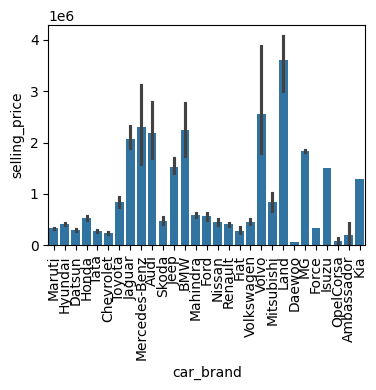

In [22]:
plt.figure(figsize=(4,4))
sns.barplot(data=df, x='car_brand', y = 'selling_price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# c. Multivariate Analysis


Multivariate analysis: Examining interactions among multiple variables.



In [23]:
numeric_df = df.select_dtypes(include=['number'])

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


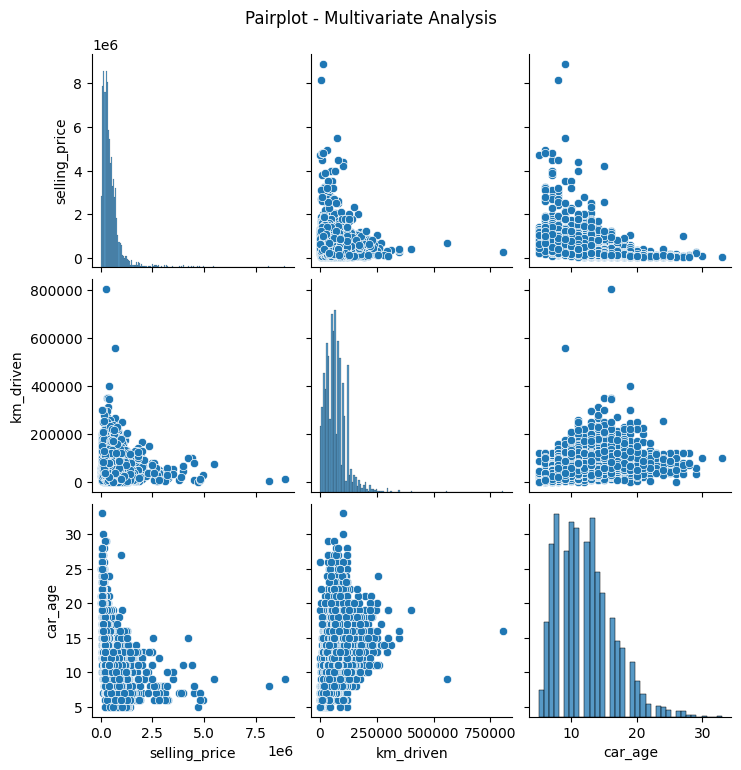

In [25]:
# ... (previous code)

# FEATURE ENGINEERING
# Create New Features
df['car_age'] = 2025 - df['year']

# ... (rest of your code, including the pairplot section)
sns.pairplot(df[['selling_price', 'km_driven', 'car_age']])
plt.suptitle("Pairplot - Multivariate Analysis", y=1.02)
plt.show()

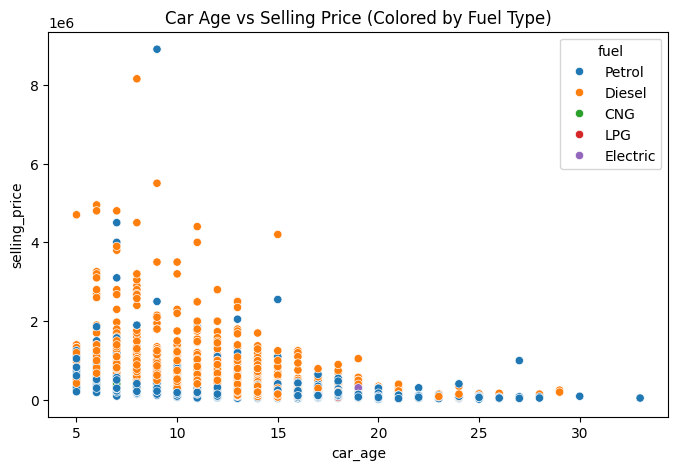

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='car_age', y='selling_price', hue='fuel')
plt.title("Car Age vs Selling Price (Colored by Fuel Type)")
plt.show()

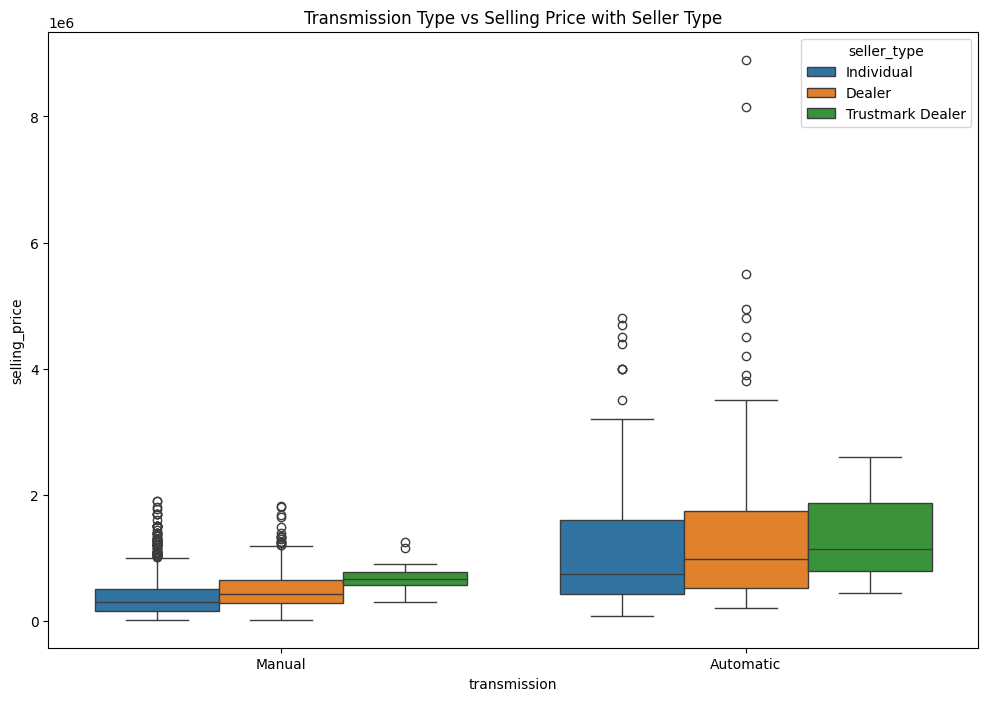

In [27]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='transmission', y='selling_price', hue='seller_type')
plt.title("Transmission Type vs Selling Price with Seller Type")
plt.show()

# Correlation Matrix

Helps identify relationships between numerical features.

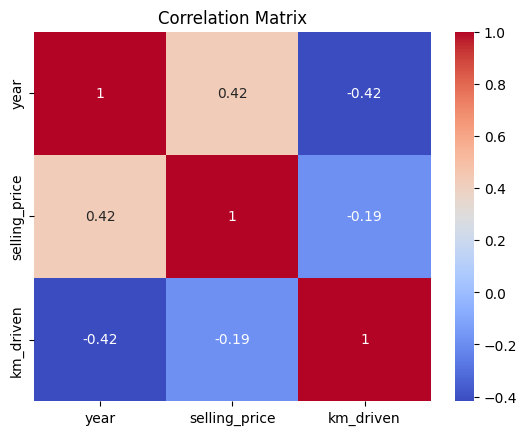

In [28]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



## Outlier Treatment

- We will not remove the outliers from selling price as it is a target variable

#### Year column

In [29]:
print(df['year'].quantile(0.99))
print(df['year'].quantile(0.01))

2020.0
2000.0


In [30]:
print(f"Mean price of cars older than 2001 : {df[(df['year'] < df['year'].quantile(0.01))]['selling_price'].mean()}")
print(f"Mean price of all cars in dataset: {df['selling_price'].mean()}")

Mean price of cars older than 2001 : 121000.0
Mean price of all cars in dataset: 473912.54207436397


In [31]:
len(df[(df['year'] < df['year'].quantile(0.01)) | (df['year'] > df['year'].quantile(0.99))])

25

- The year column has only around 41 outlier values comparing to the boxplot
- We can easily drop the values

In [32]:
df = df[~((df['year'] < df['year'].quantile(0.01)) | (df['year'] > df['year'].quantile(0.99)))]

#### KM driven column

In [33]:
print(df['km_driven'].quantile(0.98))

194940.00000000006


In [34]:
len(df[df['km_driven'] > df['km_driven'].quantile(0.98)])

72

- The values above around 180000 km are outliers
- There are only about 85 rows with outliers.
- We can eaasily drop these values.

In [35]:
df = df[~(df['km_driven'] > df['km_driven'].quantile(0.98))]

# OUTLIER TREATMENT

Outliers are extreme values that differ significantly from the rest of the data. They can distort model results. We use boxplots to detect outliers and apply methods like IQR (Interquartile Range) to remove or treat them.



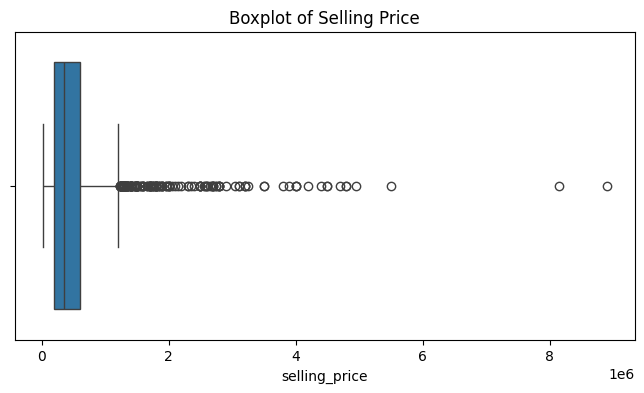

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot of Selling Price")
plt.show()


# CHECKING DISTRIBUTION AND APPLY TRANSFORMATION

Skewed data can hurt model performance. We:

Check skewness and kurtosis of features.

Apply transformations like log or square root to make data more normally distributed.

This helps improve model accuracy, especially for models that assume normality of features.



In [37]:
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(df['selling_price'])}")
print(f"Kurtosis: {kurtosis(df['selling_price'])}")


Skewness: 5.438338587130278
Kurtosis: 53.02259578085946


In [39]:
df['selling_price'] = np.log(df['selling_price'])
df['km_driven'] = np.sqrt(df['km_driven'])

# FEATURE ENGINEERING




We improve model performance by:

Creating new features:

 For example, calculating the age of the car from its manufacturing year.

Encoding categorical variables:

 Converting text categories into numbers using One-Hot Encoding (so that ML algorithms can use them).

Feature engineering often leads to better predictions and allows the model to extract more meaningful patterns.

A. Create New Features

In [40]:
df['car_age'] = 2025 - df['year']


B.One-Hot Encoding For Catagorical Variables


In [41]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)


# Spliting Data into Train and Test Sets

To evaluate model performance, we split the dataset into:

Training set: Used to train the model.

Testing set: Used to evaluate how well the model performs on unseen data.

Typically, 70–80% of the data is used for training and the rest for testing.

In [43]:
# If 'car_brand' is categorical, encode it:
df_encoded = pd.get_dummies(df, columns=['car_brand'], drop_first=True)

# Keep 'year' because it's likely important
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#from sklearn.model_selection import train_test_split
#X = df.drop(['selling_price', 'car_brand', 'year'], axis=1)
#y = df['selling_price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(y_test)
#print(y_train)

2998    2.451715
1288    2.690009
1478    2.668414
1636    2.622072
1917    2.478083
          ...   
3374    2.594114
2599    2.574318
1401    2.588116
639     2.478083
2795    2.573552
Name: selling_price, Length: 696, dtype: float64
3735    2.475234
1309    2.451715
661     2.472277
1960    2.577302
3195    2.552565
          ...   
1268    2.534612
1305    2.592955
1473    2.557167
1002    2.629317
3877    2.586211
Name: selling_price, Length: 2784, dtype: float64


# Feature Scaling

Some machine learning algorithms (like SVM, KNN) are sensitive to the scale of features. We apply Standardization (z-score scaling) to normalize the features so that each has a mean of 0 and standard deviation of 1.

This ensures that no feature dominates others just because of its range.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test_encoded.columns)

# Training Linear Regression Modle

We first apply Linear Regression, a basic regression model that assumes a linear relationship between features and the target. It provides a good baseline and is easy to interpret.

In [48]:
from sklearn.linear_model import LinearRegression
import joblib  # or use pickle

lr = LinearRegression()
model_regression = lr.fit(X_train, y_train)
joblib.dump(model_regression, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

# Prediction Using the Algorithm

After training the model, we use the test set to make predictions on unseen data. These predictions are compared against the actual car prices to see how well the model performs.

In [51]:
y_pred_lr = lr.predict(X_test)
#lr.score(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R² Score (Train):", lr.score(X_train, y_train))
print("R² Score (Test):", lr.score(X_test, y_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

R² Score (Train): 0.779093872612361
R² Score (Test): 0.7879923245818292
Mean Absolute Error: 0.023615016146418824
Root Mean Squared Error: 0.030323390523163712


# VIZUALIZEING THE PREDICTED AND ACTUAL

We plot a graph comparing the actual prices and predicted prices. This helps visualize how close the model’s predictions are to the real values.

A strong model will have predictions that align closely with actual values (near the diagonal line in the plot).

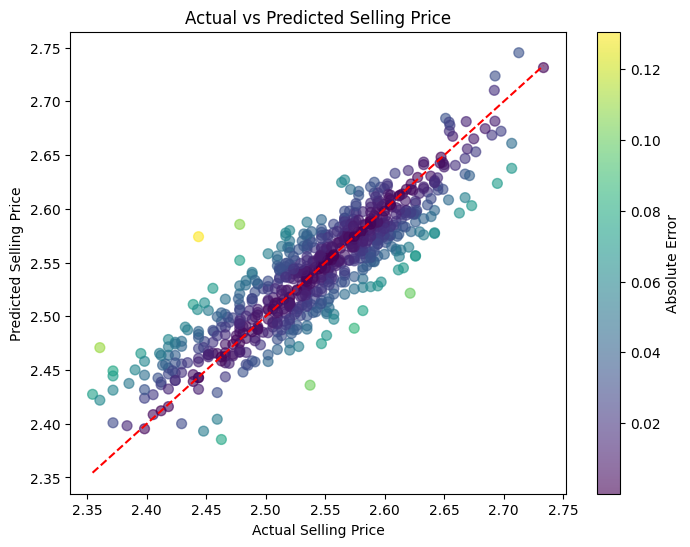

In [55]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(8,6))
#plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label='Predicted vs Actual')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
#plt.xlabel('Actual Selling Price')
#plt.ylabel('Predicted Selling Price')
#plt.title('Actual vs Predicted Selling Price')
#plt.legend()
#plt.show()


import numpy as np

errors = np.abs(y_test - y_pred_lr)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, c=errors, cmap='viridis', s=50, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.colorbar(label='Absolute Error')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

# Difference Between Actual and Predicted

We calculate the error (difference) between actual and predicted values. This can be shown using a table or list. A smaller error means better model performance.

In [56]:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr, 'Difference': y_test - y_pred_lr})
print(diff.head())


        Actual  Predicted  Difference
2998  2.451715   2.505413   -0.053698
1288  2.690009   2.668574    0.021435
1478  2.668414   2.681204   -0.012790
1636  2.622072   2.578783    0.043290
1917  2.478083   2.485009   -0.006926


# Evaluate Model Performance

We evaluate the model using these metrics:

MAE (Mean Absolute Error): Average of absolute differences.

MSE (Mean Squared Error): Average of squared differences (penalizes large errors).

RMSE (Root MSE): Square root of MSE.

R² Score: Measures how much of the variance in the target variable is explained by the model.

Adjusted R²: R² adjusted for the number of predictors used in the model.

These metrics help us understand how accurate the model is and whether it’s overfitting or underfitting.

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [58]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Adjusted R²: {adjusted_r2}")


MAE: 0.023615016146418824
MSE: 0.0009195080128202948
RMSE: 0.030323390523163712
R² Score: 0.7879923245818292
Adjusted R²: 0.7743563025794353


# Regression Models

To compare different models, we repeat the entire process with various regression algorithms:

Decision Tree Regressor:

 A tree-based model that splits the data into branches.

Random Forest Regressor:

An ensemble of decision trees (more accurate and robust).

Support Vector Machine (SVR):

Tries to fit the best line (or curve) within a margin.

K Nearest Neighbors (KNN):

Predicts based on the average price of K closest data points.

Comparing these models helps choose the best performer for car price prediction.

a. Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor


In [61]:
dt = DecisionTreeRegressor(random_state=42)
model_dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(dt.score(X_test, y_test))

joblib.dump(model_dt,'decision_tree_model.pkl')
#

0.629980408373847


['decision_tree_model.pkl']

b. Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(random_state=42)
model_rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(rf.score(X_test, y_test))

joblib.dump(model_rf,'random_forest_model.pkl')
rf.score(X_train, y_train)

0.7610878825491239


0.9455735199768369

In [64]:
rf.score(X_test, y_test)

0.7610878825491239

--------------------------------------------------------------------

In [65]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


c. Support Vector Machine
python
Copy code


In [66]:
svm = SVR()
model_svm = svm.fit(X_train_scaled, y_train)
joblib.dump(model_svm,'svm_model.pkl')
y_pred_svm = svm.predict(X_test_scaled)
print(y_pred_svm)

[2.50617004 2.64274978 2.56634416 2.54087115 2.4750618  2.52904076
 2.53856837 2.50150334 2.49873227 2.543741   2.55162446 2.49972073
 2.48204688 2.52961937 2.48637219 2.48976552 2.49335013 2.50607536
 2.48455383 2.54541898 2.49167614 2.51927515 2.55813245 2.53002911
 2.56060027 2.50196561 2.55234134 2.54040792 2.47908013 2.51015838
 2.53595624 2.51223796 2.51874486 2.55723487 2.53582695 2.56556046
 2.5630324  2.53263265 2.49221898 2.51568343 2.4543155  2.51445533
 2.56024273 2.51700475 2.52546019 2.56657222 2.56080509 2.5438431
 2.54101675 2.51629133 2.56060198 2.52002951 2.55113947 2.54788716
 2.55433846 2.61861474 2.59248487 2.54895898 2.5542173  2.57305789
 2.58123663 2.53517553 2.52822215 2.51721972 2.57262332 2.51552745
 2.51462883 2.4837994  2.5004712  2.53525191 2.56103261 2.53418112
 2.57017072 2.48782911 2.53023296 2.54603877 2.52639183 2.45642396
 2.45396107 2.52432263 2.57096372 2.54227566 2.53695827 2.48455151
 2.57868779 2.57527801 2.56665545 2.57911731 2.57079169 2.56523

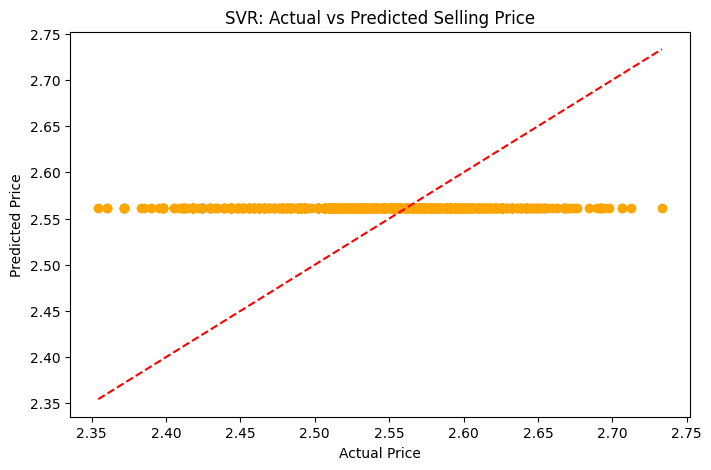

In [67]:
# Predict using the SVR model
y_pred_svr = svm.predict(X_test)

# Plot for SVR
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_svr, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("SVR: Actual vs Predicted Selling Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [68]:
svm.score(X_test, y_test)

-0.08173719812016422

d. K Nearest Neighbor

In [69]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Set up the SVM regressor
svm = SVR()

# Perform GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_svm = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test_scaled)

Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [72]:
# R² Score
print("R² Score (Test):", best_svm.score(X_test_scaled, y_test))

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score (Test): 0.6984076541629194
Mean Absolute Error: 0.028623193949338974
Mean Squared Error: 0.0013080497111978469


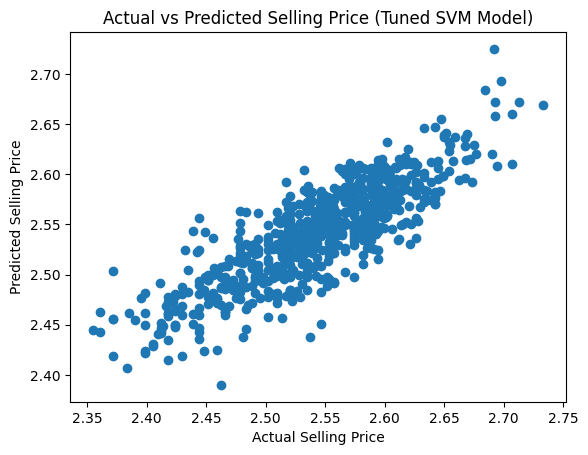

In [74]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Tuned SVM Model)')
plt.show()

In [75]:
from sklearn.neighbors import KNeighborsRegressor


In [76]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print(y_pred_knn)

[2.51606206 2.66651797 2.61137726 2.57047473 2.45332428 2.54359457
 2.57062211 2.49985562 2.48183052 2.55348414 2.56849123 2.46123261
 2.46481262 2.53267042 2.45218429 2.45554116 2.50789276 2.50148305
 2.45033923 2.58335882 2.46233273 2.5283033  2.56765889 2.52588069
 2.59610363 2.52999055 2.5694208  2.53386273 2.47211711 2.53649313
 2.57723071 2.5199741  2.55253756 2.55423532 2.52072809 2.62467052
 2.58539075 2.56529123 2.52944396 2.57368701 2.49370491 2.56621095
 2.5292611  2.55392574 2.50519666 2.5980683  2.53501012 2.58186844
 2.59606034 2.51353165 2.59363355 2.51671512 2.56586864 2.51765846
 2.61513185 2.69867806 2.62865803 2.57338001 2.54394232 2.59316303
 2.61021009 2.52197275 2.51191393 2.49459547 2.59691491 2.53130873
 2.4982625  2.50636998 2.50416927 2.52570878 2.58425416 2.50733138
 2.59349519 2.44639649 2.5403576  2.57580252 2.57114846 2.43011569
 2.42024787 2.55925112 2.58098619 2.53837452 2.56689544 2.46515779
 2.61941887 2.6113508  2.61057591 2.59686709 2.57847951 2.5703

# CROSS VALIDATION

Cross-validation (like K-Fold) divides the data into several parts and tests the model on different subsets. This gives a more reliable estimate of model performance and ensures it's not just doing well on one specific train/test split

In [77]:
from sklearn.model_selection import cross_val_score


In [78]:
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'SVR': svm, 'KNN': knn}

for name, model in models.items():
    if name in ['SVR', 'KNN']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Cross-Validation Score: {scores.mean()}")


Linear Regression Cross-Validation Score: 0.7688554519619993
Decision Tree Cross-Validation Score: 0.5900925769411702
Random Forest Cross-Validation Score: 0.7350343592021624
SVR Cross-Validation Score: 0.547253182298177
KNN Cross-Validation Score: 0.7312450649903892


# FINAL CONCLUSION

We built a model to predict the price of used cars based on features like the car’s brand, year, kilometers driven, fuel type, and more.

Here's what we did, step by step:

Cleaned the data to remove missing values and duplicates.

Explored the data to understand how different features affect car prices.

Removed outliers to avoid weird or extreme values from messing with the model.

Converted text into numbers (like fuel types, transmission, etc.).

Trained different models using machine learning:

Linear Regression

Decision Tree

Random Forest

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)

Checked performance of all models using metrics like MAE, MSE, RMSE, and R².

Used cross-validation to make sure the model works well on different parts of the data.

# Best-performing model:
In most cases, the Random Forest Regressor gave the best predictions. It's powerful because it uses multiple decision trees to improve accuracy.

 # Main learning:

Data cleaning and preparation are super important.

Models like Random Forest can handle complex data and give great results.

Even basic models like Linear Regression are helpful to understand the data better.

